In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
from panel import widgets
from panel import interact
import plotly.express as px
from pathlib import Path
import numpy as np
from datetime import datetime, timedelta
import alpaca_trade_api as tradeapi
import os
import seaborn as sns
from dotenv import load_dotenv
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA
import csv


%matplotlib inline

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')


In [22]:
#The commented out steps below were run once to get the data, than the data was saved to csvs.


# #Read the API key

# load_dotenv()

# APCA_API_KEY_ID = os.getenv("Api_key")
# APCA_SECRET_KEY = os.getenv("Secret_key")

# api = tradeapi.REST(APCA_API_KEY_ID, APCA_SECRET_KEY, api_version='v2')

# type(APCA_API_KEY_ID)



In [23]:
# # Import Data from alpha vantage, may have to wait a minute between cells.

# materials = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')

# industrials = api.alpha_vantage.historic_quotes('XLI', adjusted=True, output_format='pandas')

# technology = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')

# real_estate = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')

# staples = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')
# staples.head()




In [24]:
# # Import Data from alpha vantage, may have to wait a minute between cells.

# cons_disc = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')

# utilities = api.alpha_vantage.historic_quotes('XLU', adjusted=True, output_format='pandas')

# financials = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

# transports = api.alpha_vantage.historic_quotes('IYT', adjusted=True, output_format='pandas')

# health = api.alpha_vantage.historic_quotes('XLV', adjusted=True, output_format='pandas')


In [25]:
# # Import Data from alpha vantage, may have to wait a minute between cells.

# energy = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')

# spy = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


In [26]:
# #Set up data for backtesting

# materials.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# materials.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# materials.sort_index(ascending=True, inplace=True)

# industrials.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# industrials.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# industrials.sort_index(ascending=True, inplace=True)

# technology.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# technology.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# technology.sort_index(ascending=True, inplace=True)

# real_estate.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# real_estate.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# real_estate.sort_index(ascending=True, inplace=True)

# staples.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# staples.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# staples.sort_index(ascending=True, inplace=True)

# cons_disc.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# cons_disc.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# cons_disc.sort_index(ascending=True, inplace=True)

# utilities.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# utilities.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# utilities.sort_index(ascending=True, inplace=True)

# financials.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# financials.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# financials.sort_index(ascending=True, inplace=True)

# transports.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# transports.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# transports.sort_index(ascending=True, inplace=True)

# health.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# health.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# health.sort_index(ascending=True, inplace=True)

# energy.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# energy.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# energy.sort_index(ascending=True, inplace=True)

# spy.rename(columns={'1. open':'Open','2. high':'High','3. low':'Low', '5. adjusted close':'Close', '6. volume':'Volume'}, inplace=True)
# spy.drop(columns=['4. close','7. dividend amount', '8. split coefficient'], inplace=True)
# spy.sort_index(ascending=True, inplace=True)



In [27]:
#Save the data to csv to avoid using alpha vantage, (added csvs to gitignore)

# materials.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/materials_backtest.csv")
# industrials.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/industrials_backtest.csv")
# technology.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/technology_backtest.csv")
# real_estate.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/real_estate_backtest.csv")
# staples.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/staples_backtest.csv")
# utilities.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/utilities_backtest.csv")
# financials.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/financials_backtest.csv")
# transports.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/transports_backtest.csv")
# health.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/health_backtest.csv")
# energy.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/energy_backtest.csv")
# cons_disc.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/cons_disc_backtest.csv")
# spy.to_csv("C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/spy_backtest.csv")



In [40]:
#Read in data from csvs for each sector

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/materials_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
materials = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/industrials_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
industrials = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/technology_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
technology = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/real_estate_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
real_estate = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/staples_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
staples = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/cons_disc_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
cons_disc = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/utilities_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
utilities = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/financials_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
financials = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/energy_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
energy = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/transports_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
transports = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/health_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
health = pd.read_csv(csvpath)

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/spy_backtest.csv",
                  index_col="date", infer_datetime_format=True, parse_dates=True)
spy = pd.read_csv(csvpath)



In [41]:
# Define Panel Visualization Functions
#Function to create backtesting plot

def backtest_sp500():
    class SmaCross(Strategy):
        
        n1=10
        n2=75
        
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close,self.n1)
            self.ma2 = self.I(SMA, Close,self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()

        
                
    bt_spy = Backtest(spy, SmaCross,
                              cash=10000, commission=.002)
    
#     stats = bt_spy.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)
   

    bt_spy.run()
    #bt_spy_plot = bt_spy.plot()
    #return bt_materials_plot
    #return stats
    return bt_spy.run()


In [42]:
# Define Panel Visualization Functions
#Function to create backtesting plot
def backtest_materials():
    class SmaCross(Strategy):
        
        n1 =10
        n2 =75
        
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_materials = Backtest(materials, SmaCross,
                              cash=10000, commission=.002)
#     stats = bt_materials.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)   
    
    bt_materials.run()
    #bt_materials_plot = bt_materials.plot()
    #return stats
    return bt_materials.run()

In [43]:
def backtest_industrials():
    class SmaCross(Strategy):
        
        n1=5
        n2=250
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_industrials = Backtest(industrials, SmaCross,
                              cash=10000, commission=.002)
    
#     stats = bt_industrials.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)   
    bt_industrials.run()
    #bt_industrials_plot = bt_industrials.plot()
            
    #return stats
    return bt_industrials.run()

In [44]:
def backtest_technology():
    class SmaCross(Strategy):
        
        n1=10
        n2=95
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_technology = Backtest(technology, SmaCross,
                              cash=10000, commission=.002)
    
#     stats = bt_technology.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)   
    bt_technology.run()
    #bt_technology_plot = bt_technology.plot()
            
    #return stats
    return bt_technology.run()

In [45]:
def backtest_real_estate():
    class SmaCross(Strategy):
        n1=20
        n2=50
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_real_estate = Backtest(real_estate, SmaCross,
                              cash=10000, commission=.002)
    
    
#     stats = bt_real_estate.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_real_estate.run()
    #bt_real_estate_plot = bt_real_estate.plot()
            
    #return stats
    return bt_real_estate.run()

In [46]:
def backtest_staples():
    class SmaCross(Strategy):
        n1=25
        n2=355
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_staples = Backtest(staples, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_staples.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_staples.run()
    #bt_real_estate_plot = bt_real_estate.plot()
            
    #return stats
    return bt_staples.run()

In [47]:
def backtest_cons_disc():
    class SmaCross(Strategy):
        n1=5
        n2=220
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_cons_disc = Backtest(cons_disc, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_cons_disc.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_cons_disc.run()
    #bt_real_estate_plot = bt_real_estate.plot()
            
    #return stats
    return bt_cons_disc.run()

In [48]:
def backtest_utilities():
    class SmaCross(Strategy):
        n1=10
        n2=300
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_utilities = Backtest(utilities, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_utilities.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_utilities.run()
    #bt_real_estate_plot = bt_real_estate.plot()
            
    #return stats
    return bt_utilities.run()

In [49]:
def backtest_financials():
    class SmaCross(Strategy):
        n1=15
        n2=125
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_financials = Backtest(financials, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_financials.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_financials.run()
    #bt_real_estate_plot = bt_real_estate.plot()
            
    #return stats
    return bt_financials.run()

In [50]:
def backtest_transports():
    class SmaCross(Strategy):
        n1=25
        n2=155
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_transports = Backtest(transports, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_transports.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_transports.run()
    #bt_real_estate_plot = bt_real_estate.plot()
    #return stats        
    return bt_transports.run()

In [51]:
def backtest_health():
    class SmaCross(Strategy):
        n1=25
        n2=65
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_health = Backtest(health, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_health.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_health.run()
    #bt_real_estate_plot = bt_real_estate.plot()
    #return stats        
    return bt_health.run()

In [52]:
def backtest_energy():
    class SmaCross(Strategy):
        n1=25
        n2=260
        def init(self):
            Close = self.data.Close
            self.ma1 = self.I(SMA, Close, self.n1)
            self.ma2 = self.I(SMA, Close, self.n2)

        def next(self):
            if crossover(self.ma1, self.ma2):
                self.buy()
            elif crossover(self.ma2, self.ma1):
                self.sell()


    bt_energy = Backtest(energy, SmaCross,
                          cash=10000, commission=.002)
    
    
#     stats = bt_energy.optimize(n1=range(5, 30, 5),
#                     n2=range(10, 365, 5),
#                     maximize='Equity Final [$]',
#                     constraint=lambda p: p.n1 < p.n2)     
    
    bt_energy.run()
    #bt_real_estate_plot = bt_real_estate.plot()
    return bt_energy.run()       
    #return stats

In [53]:
#Cumulative returns plots for all sectors

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/returns.csv",
                      index_col="date", infer_datetime_format=True, parse_dates=True)
returns_df = pd.read_csv(csvpath)

def cumulative_return_plot():
    
    # Calculate the cumulative returns using the 'cumprod()' function
    cumulative_returns_materials = (1 + returns_df['Materials return']).cumprod()
    cumulative_returns_tech = (1 + returns_df['Tech return']).cumprod()
    cumulative_returns_RE = (1 + returns_df['RE return']).cumprod()
    cumulative_returns_Discretionary = (1 + returns_df['Discretionary return']).cumprod()
    cumulative_returns_Staples = (1 + returns_df['Staples return']).cumprod()
    cumulative_returns_Energy = (1 + returns_df['Energy return']).cumprod()
    cumulative_returns_Fin = (1 + returns_df['Fin return']).cumprod()
    cumulative_returns_HealthCare = (1 + returns_df['HealthCare return']).cumprod()
    cumulative_returns_Industrials = (1 + returns_df['Industrials return']).cumprod()
    cumulative_returns_Utilities = (1 + returns_df['Utilities return']).cumprod()
    cumulative_returns_Transports = (1 + returns_df['Transports return']).cumprod()
    cumulative_returns_SP500 = (1 + returns_df['S&P 500 return']).cumprod()


    return  (cumulative_returns_materials.plot(figsize=(10,5), legend=True),
            cumulative_returns_tech.plot(figsize=(10,5), legend=True),
            cumulative_returns_RE.plot(figsize=(10,5), legend=True),
            cumulative_returns_Discretionary.plot(figsize=(10,5), legend=True),
            cumulative_returns_Staples.plot(figsize=(10,5), legend=True),
            cumulative_returns_Energy.plot(figsize=(10,5), legend=True),
            cumulative_returns_Fin.plot(figsize=(10,5), legend=True),
            cumulative_returns_HealthCare.plot(figsize=(10,5), legend=True),
            cumulative_returns_Industrials.plot(figsize=(10,5), legend=True),
            cumulative_returns_Utilities.plot(figsize=(10,5), legend=True),
            cumulative_returns_Transports.plot(figsize=(10,5), legend=True),
            cumulative_returns_SP500.plot(figsize=(10,5), legend=True))


    
     

In [57]:

#Visualize cumulative returns vs s&P 500

csvpath = Path(f"C:/Users/costa/Desktop/byte/rice/ru-hou-fin-pt-03-2020-u-c/p1-Formula_1/data/sector_data/returns.csv",
                      index_col="date", infer_datetime_format=True, parse_dates=True)
returns_df = pd.read_csv(csvpath)


def materials_cumulative_plot():

# Calculate the cumulative returns using the 'cumprod()' function
    cumulative_returns_materials = (1 + returns_df['Materials return']).cumprod()
    cumulative_returns_SP500 = (1 + returns_df['S&P 500 return']).cumprod()
    
    return (cumulative_returns_SP500.plot(figsize=(10,5), legend=True),
            cumulative_returns_materials.plot(figsize=(10,5), legend=True))

def industrials_cumulative_plot():

# Calculate the cumulative returns using the 'cumprod()' function
    cumulative_returns_industrials = (1 + returns_df['Industrials return']).cumprod()
    cumulative_returns_SP500 = (1 + returns_df['S&P 500 return']).cumprod()
    
    return (cumulative_returns_SP500.plot(figsize=(10,5), legend=True),
            cumulative_returns_industrials.plot(figsize=(10,5), legend=True))


def tech_cumulative_plot():

# Calculate the cumulative returns using the 'cumprod()' function
    cumulative_returns_tech = (1 + returns_df['Tech return']).cumprod()
    cumulative_returns_SP500 = (1 + returns_df['S&P 500 return']).cumprod()
    
    return (cumulative_returns_SP500.plot(figsize=(10,5), legend=True),
            cumulative_returns_tech.plot(figsize=(10,5), legend=True))

def financials_cumulative_plot():

# Calculate the cumulative returns using the 'cumprod()' function
    cumulative_returns_fin = (1 + returns_df['Fin return']).cumprod()
    cumulative_returns_SP500 = (1 + returns_df['S&P 500 return']).cumprod()
    
    return (cumulative_returns_SP500.plot(figsize=(10,5), legend=True),
            cumulative_returns_fin.plot(figsize=(10,5), legend=True))







C:\Users\costa\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:24: UserWarning:

Data index is not datetime. Assuming simple periods.

C:\Users\costa\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:22: UserWarning:

Data index is not datetime. Assuming simple periods.

C:\Users\costa\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:19: UserWarning:

Data index is not datetime. Assuming simple periods.

C:\Users\costa\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:19: UserWarning:

Data index is not datetime. Assuming simple periods.

C:\Users\costa\Anaconda3\envs\vizenv\lib\site-packages\ipykernel_launcher.py:18: UserWarning:

Data index is not datetime. Assuming simple periods.



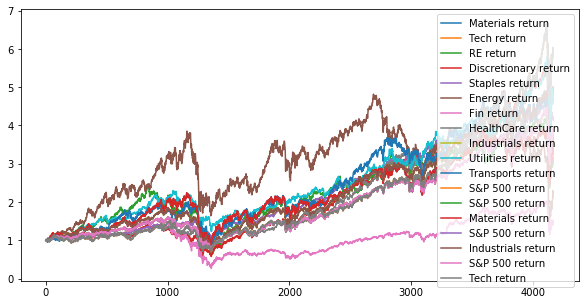

In [58]:
# Create panels to structure the layout of the dashboard


column1 = pn.Column(
    "## S&P 500 backtest, best strategy = 10/75 crossover", 
    backtest_sp500(), 
    cumulative_return_plot()
   
)

column2 = pn.Column(
    "## Materials backtest, best strategy = 10/360 crossover", backtest_materials(),
    materials_cumulative_plot()
   
)

column3 = pn.Column(
      "## Industrials backtest, best strategy = 5/250 crossover ", backtest_industrials(), 
    industrials_cumulative_plot() 
   
 )

column4 = pn.Column(
        "## Technology backtest, best strategy = 10/95 crossover", backtest_technology(),
    tech_cumulative_plot()
)
 
column5 = pn.Column(
        "## Real Estate backtest, best strategy = buy and hold,", backtest_real_estate(), 
)

column6 = pn.Column(
        "## Staples backtest, best strategy = buy and hold,", backtest_staples(), 
)

column7 = pn.Column(
        "## Consumer Discretionary backtest, best strategy = buy and hold", backtest_cons_disc(), 
)

column8 = pn.Column(
        "## Utilities backtest, best strategy = buy and hold", backtest_utilities(), 
)

column9 = pn.Column(
        "## Financials backtest, best strategy = 15/125 crossover", backtest_financials(),     
)

column10 = pn.Column(
        "## Transports backtest, best strategy = buy and hold", backtest_transports(),     
)

column11 = pn.Column(
        "## Health backtest, best strategy = buy and hold", backtest_health(),     
)

column12 = pn.Column(
         "## Energy backtest, best strategy = 25/260 crossover", backtest_energy(),     
)


# column4 = pn.Column(
#     "## Parallel Coordinates and Parallel Categories",
#     create_parallel_coordinates(),
#     create_parallel_categories(),
# )

# Create tabs


sector_dashboard = pn.Tabs(
    ("SP 500", column1), ("Materials", column2), ("Industrials", column3), ("Technology", column4),
    ("Real Estate", column5),("Staples",column6), ("Consumer Discretionary", column7),
    ("Utilities", column8),("Financials", column9),("Transports", column10),("Health", column11),
    ("Energy", column12)
)  
    
    #("Avg Sales Prices", column2), ("Top 10 Neighborhoods and Map", column3),
    #("Parallels", column4)
    


In [56]:
#Serve the dashboard

sector_dashboard.servable()


Tabs
    [0] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
        [2] Str(tuple)
    [1] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
        [2] Str(tuple)
    [2] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [3] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [4] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [5] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [6] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [7] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [8] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [9] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [10] Column
        [0] Markdown(str)
        [1] DataFrame(Series)
    [11] Column
        [0] Markdown(str)
        [1] DataFrame(Series)

In [ ]:
# Wrap Plotly object by explicitly declaring Panel pane
# pane = pn.pane.Plotly(plot)
# pane

In [ ]:
# Wrap Plotly object by using panel.panel helper function
#pn.panel(plot)

In [ ]:
# Print the type of object
#pane.pprint()

In [ ]:
# Create row
# row = pn.Row(scatter_plot, bar_plot)
# row

In [ ]:
# Create column using Markdown and row object
# column = pn.Column(
#     '# Allegheny, PA Real Estate Visualizations',
#     '## *Sales and Foreclosures*',
#     row)
# column

In [ ]:
# Put bar plots in row
# row_of_bar = pn.Row(num_foreclosures_plot)
# row_of_bar.append(num_sales_plot)

In [ ]:
# Put parallel plots in a single row
#row_of_parallel = pn.Row(parallel_categories, parallel_coordinates)

In [ ]:
# Insert row_of_parallel and row_of_Bar into a column object with Markdown text
# plots_as_column = pn.Column(
#     "# Allegheny Real Estate Dashboard", row_of_parallel, row_of_bar
# )

In [ ]:
# Create tabs
## Create tabs
# tabs = pn.Tabs(
#     ("All Plots", plots_as_column),
#     ("General Plots", row_of_bar),
#     ("Statistical Plots", row_of_parallel)
# )
# tabs